# **Assignment: 04- Chaos**
#### **Author: Julia Poblotzki**
#### **Due: December 9, 2022 @ 11:59pm**
###### _______________________________________________________________________________
##### *Created By    : Jared W. Marquis*
##### *Creation Date : 01 August 2022*
##### *Course        : ATSC 528 - Atmospheric Data Analysis*
##### *Assignment    : 04 - Chaos*
###### _______________________________________________________________________________
### **Purpose:** *Script to examine how chaos manifests in a simple model.*

[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]


In [1]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles
from mpl_toolkits import mplot3d


In [2]:
## Defining Variables

a = 0.25
b = 4.0
F = 8.0
G = 1.0

#initial conditions for the two simulations
xo = np.array([2.5, 2.49])
yo = np.array([1.0, 1.0])
zo = np.array([0.0, 0.0])

# timestep of 4 hours
t = 4 / (24*5) #this is in days because the equations are normalized to 5 days

time = np.arange(0,120,t)

#### dx/dt
$ x(t+dt) = x(t) + dt[-y(t)² - z(t)² - [a*x(t)] + [a*F]] $

#### dy/dt
$ y(t+dt) = y(t) + dt[ [x(t)*y(t)] - [b * x(t) * z(t)] - y(t) + G] $

#### dz/dt
$ z(t+dt) = z(t) + dt[[b*x(t)*y(t)] + [x(t)*z(t)] - z(t)] $

In [28]:
x = np.zeros((len(time), len(xo)))
y = np.zeros((len(time), len(yo)))
z = np.zeros((len(time), len(zo)))

x[0,0] = xo[0]
x[0,1] = xo[1]

y[0,0] = yo[0]
y[0,1] = yo[1]

z[0,0] = zo[0]
z[0,1] = zo[1]


for m in range(len(xo)):
    for i in range(len(time)-1):
        x[(i+1),m] = x[i,m] + (t * (-((y[i,m])**2) - ((z[i,m])**2) - (a * x[i,m]) + (a*F)))
        y[(i+1),m] = y[i,m] + (t * ((x[i,m]*y[i,m]) - (b*x[i,m]*z[i,m]) - y[i,m] + G))
        z[(i+1),m] = z[i,m] + (t * ((b*x[i,m]*y[i,m]) + (x[i,m]*z[i,m]) - z[i,m]))

In [29]:
diff_x = x[:,1] - x[:,0]
diff_y = y[:,1] - y[:,0]
diff_z = z[:,1] - z[:,0]

Text(0.5, 0, 'Time (days)')

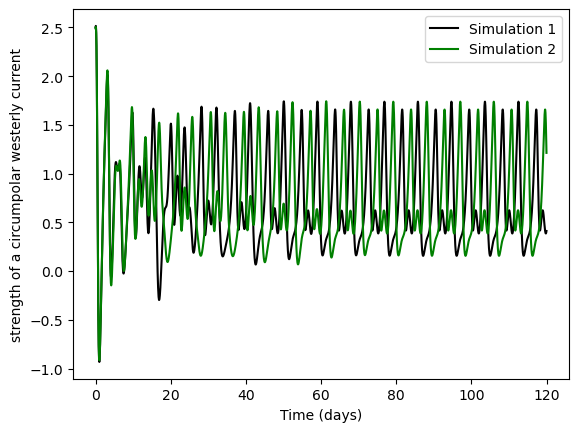

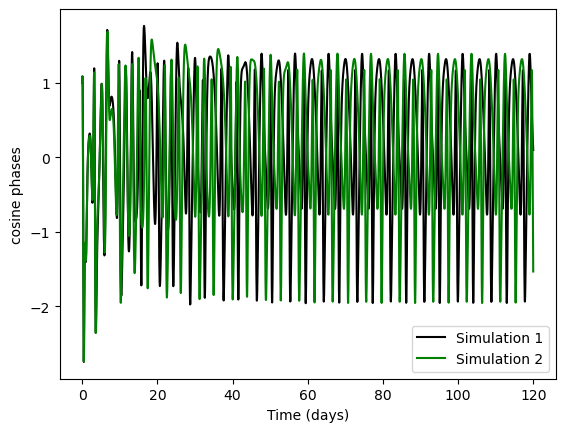

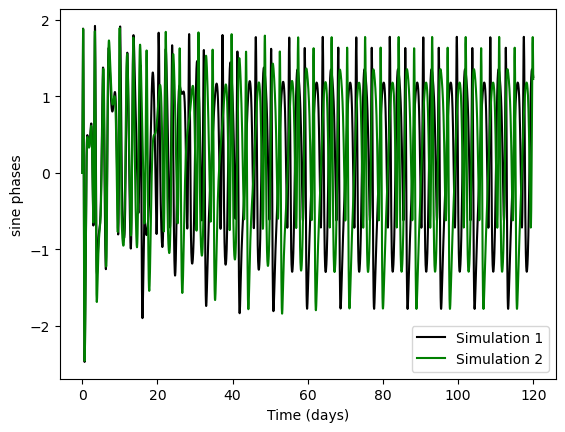

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, x[:,0], c='Black')
ax1.plot(time, x[:,1], c='Green')
ax1.legend(['Simulation 1', 'Simulation 2'])
plt.ylabel('strength of a circumpolar westerly current')
plt.xlabel('Time (days)')


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, y[:,0], c='Black')
ax1.plot(time, y[:,1], c='Green')
ax1.legend(['Simulation 1', 'Simulation 2'])
plt.ylabel('cosine phases')
plt.xlabel('Time (days)')


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, z[:,0], c='Black')
ax1.plot(time, z[:,1], c='Green')
ax1.legend(['Simulation 1', 'Simulation 2'])
plt.ylabel('sine phases')
plt.xlabel('Time (days)')


Text(0.5, 0, 'Time (days)')

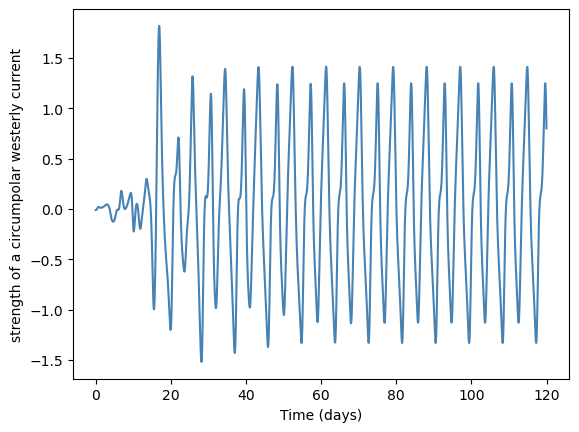

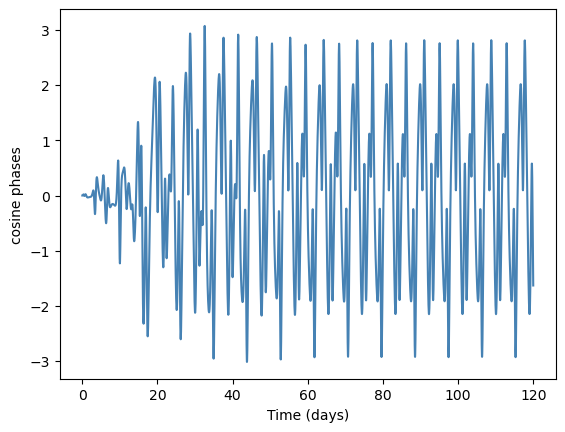

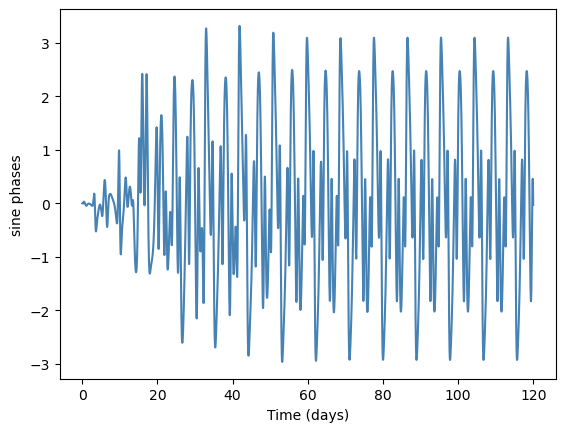

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, diff_x, c='steelblue')
plt.ylabel('strength of a circumpolar westerly current')
plt.xlabel('Time (days)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, diff_y, c='steelblue')
plt.ylabel('cosine phases')
plt.xlabel('Time (days)')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(time, diff_z, c='steelblue')
plt.ylabel('sine phases')
plt.xlabel('Time (days)')


Text(0.5, 0.92, 'Simulation 2')

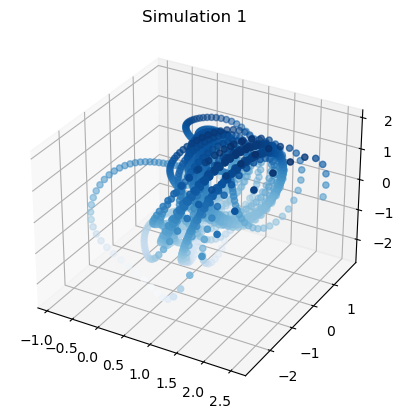

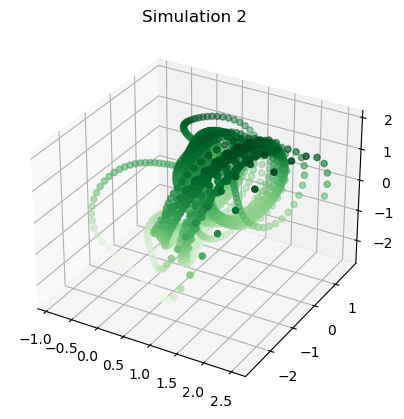

In [35]:
## Plots?

fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter3D(x[:,0],y[:,0],z[:,0], c=z[:,0], cmap = 'Blues')
plt.title('Simulation 1')


fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter3D(x[:,1],y[:,1],z[:,1], c=z[:,1], cmap = 'Greens')
plt.title('Simulation 2')

### In a separate text file (or below), provide a discussion of your results. Make sure to answer the following questions in your discussion:

1 - Are the two simulations the same throughout the entire period? If not, when do they diverge?



2 - If the ending points are different, what does this say regarding the importance of providing NWP models, assuming this serves as a proxy for one, with accurate and balanced initial conditions?
